
<div style="line-height:2px;border: solid orange">
    <p>
    <p style="color:blue;font-family:arial;text-align:right;font-size:20"> Visión por Computador &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Master en Ciencias de Datos e Ingeniería de ordenadores   &nbsp;&nbsp;
  <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Rosa Mª. Rodríguez Sánchez   &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> Dpto. Ciencias de la Computación e Inteligencia Artificial. &nbsp;&nbsp;  
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> ETSIIT. Universidad de Granada   &nbsp;&nbsp;
        <p>
</div>


## Práctica 3.Transformaciones y Operaciones con Imágenes.


### Objetivo
En esta práctica el objetivo es que modifiquemos los niveles de intensidad de una imagen. Para ello aprenderemos:
* Como aplicar operaciones artiméticas.
* Como aplicar operaciones lógicas
* Efectos de las transformaciones en el histograma de una imagen
* Función de transferencia.
* Ecualización del histograma 


##### Operaciones Aritméticas
Las operaciones artiméticas que podemos aplicar es sumar, restar, multiplicar y dividir por un escalar. 


(<Axes: >, [<matplotlib.lines.Line2D at 0x7b6ed8b38410>], (-10.0, 296.0))

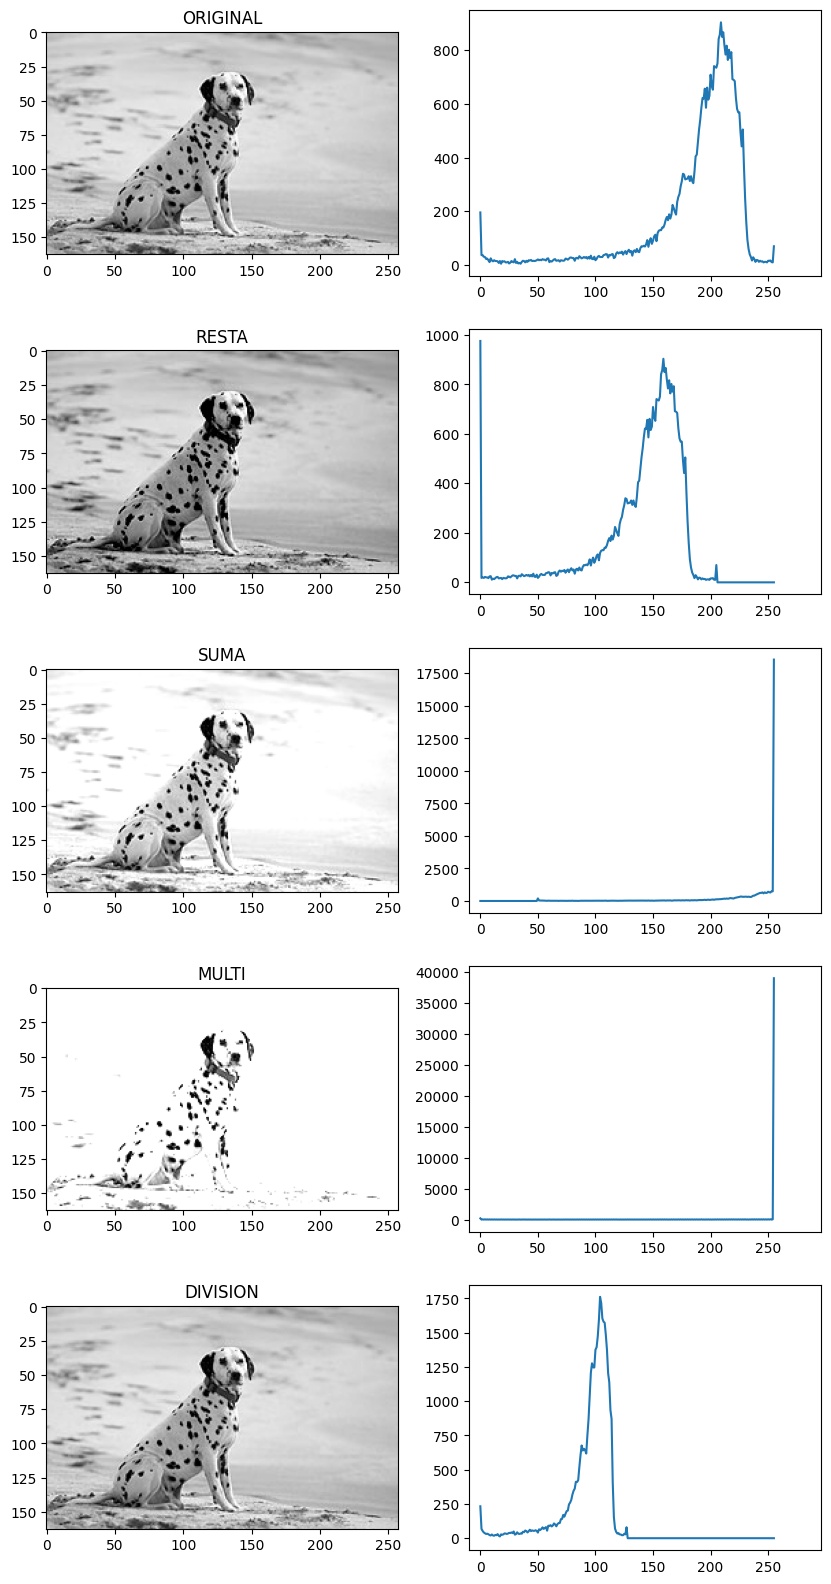

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

I = cv2.imread("dalmata.jpg", 0)
hori = cv2.calcHist([I], [0], None, [256], [0, 256])

k = 50
Is = cv2.add(I, k)
hs = cv2.calcHist([Is], [0], None, [256], [0, 256])
Ir = cv2.add(I, -k)
hr = cv2.calcHist([Ir], [0], None, [256], [0, 256])

Im = I * 2.0
Im[Im > 255] = 255
# for i in range(Im.shape[0]):
#    for j in range(Im.shape[1]):
#        if (Im[i,j]>255):
#            Im[i,j]=255


Im = Im.astype("uint8")
hm = cv2.calcHist([Im], [0], None, [256], [0, 256])

Id = I / 2

Id = Id.astype("uint8")
hd = cv2.calcHist([Id], [0], None, [256], [0, 256])
plt.figure(figsize=(10, 20))

plt.subplot(5, 2, 1), plt.imshow(I, "gray"), plt.title("ORIGINAL")
plt.subplot(5, 2, 2), plt.plot(hori), plt.xlim([-10, 296])

plt.subplot(5, 2, 5), plt.imshow(Is, "gray"), plt.title("SUMA")
plt.subplot(5, 2, 6), plt.plot(hs), plt.xlim([-10, 296])

plt.subplot(5, 2, 3), plt.imshow(Ir, "gray"), plt.title("RESTA")
plt.subplot(5, 2, 4), plt.plot(hr), plt.xlim([-10, 296])

plt.subplot(5, 2, 7), plt.imshow(Im, "gray"), plt.title("MULTI")
plt.subplot(5, 2, 8), plt.plot(hm), plt.xlim([-10, 296])

plt.subplot(5, 2, 9), plt.imshow(Id, "gray"), plt.title("DIVISION")
plt.subplot(5, 2, 10), plt.plot(hd), plt.xlim([-10, 296])


Tambien podemos sumar o restar dos imágenes. 

(<Axes: title={'center': 'Resta'}>,
 Text(0.5, 1.0, 'Resta'))

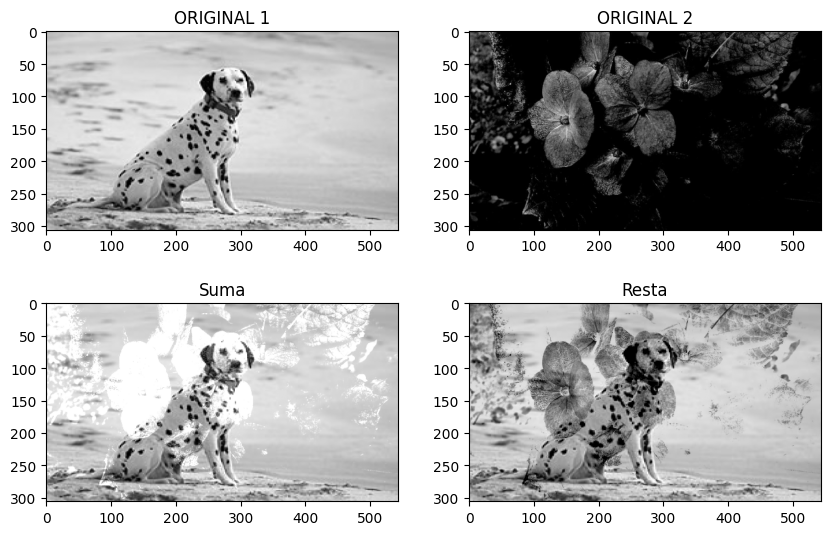

In [ ]:
import numpy as np
import cv2

from matplotlib import pyplot as plt

I2 = cv2.imread("flores.png", 0)
I1 = cv2.imread("dalmata.jpg", 0)
# igualamos el tamaño
width = I2.shape[1]
height = I2.shape[0]
dim = (width, height)

# resize image
I1 = cv2.resize(I1, dim, interpolation=cv2.INTER_AREA)


# suma
Is = cv2.add(I1, I2)

# resta
Ir = cv2.addWeighted(I1, 1, I2, -1, 0)
# Ir = cv2.subtract(I1,I2)
plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1), plt.imshow(I1, "gray"), plt.title("ORIGINAL 1")
plt.subplot(3, 2, 2), plt.imshow(I2, "gray"), plt.title("ORIGINAL 2")

plt.subplot(3, 2, 3), plt.imshow(Is, "gray"), plt.title("Suma")
plt.subplot(3, 2, 4), plt.imshow(Ir, "gray"), plt.title("Resta")


### Operaciones Lógicas.
Las operaciones lógicas son: not, and, or, xor . Las tablas de verdad de estás operaciones son las siguientes:
<table>
    <tr><td>A</td><td>B</td><td>not A</td> <td>A and B</td>  <td>A or B</td>  <td>A xor B</td> <tr>
   <tr> <td>0</td><td>0</td><td>1</td><td>0</td><td>0</td><td>0</td></tr>
    <tr><td>0</td><td>1</td><td>1</td><td>0</td><td>1</td><td>1</td></tr>
    <tr><td>1</td><td>0</td><td>0</td><td>0</td><td>1</td><td>1</td></tr>
    <tr><td>1</td><td>1</td><td>0</td><td>1</td><td>1</td><td>0</td></tr>
</table>
Veamos un ejemplo con imágenes binarias. 

(<matplotlib.image.AxesImage at 0x7b6eb95d7950>,
 Text(0.5, 1.0, 'not (not A or not B)'))

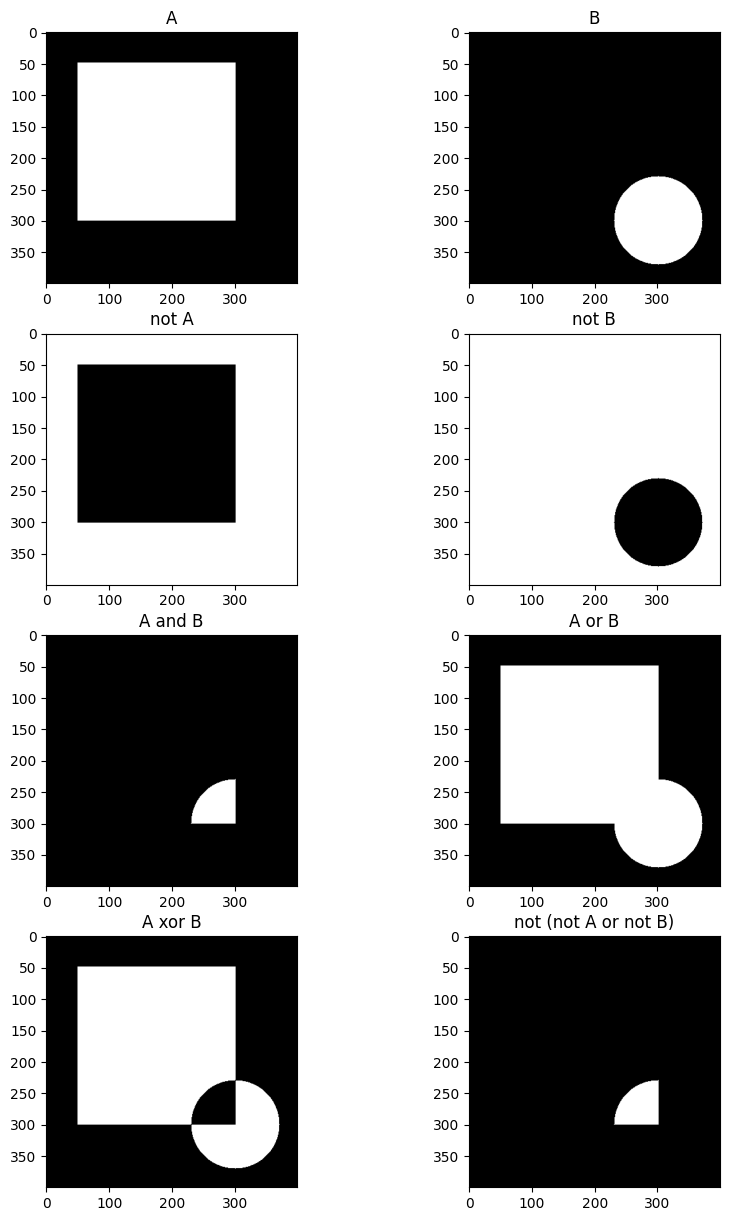

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img_rectangle = np.zeros((400, 400), dtype="uint8")
cv2.rectangle(img_rectangle, (50, 50), (300, 300), (255, 255, 255), -1)

img_circle = np.zeros((400, 400), dtype="uint8")
cv2.circle(img_circle, (300, 300), 70, (255, 255, 255), -1)
img_notA = cv2.bitwise_not(img_rectangle)
img_notB = cv2.bitwise_not(img_circle)
img_and = cv2.bitwise_and(img_rectangle, img_circle)
img_or = cv2.bitwise_or(img_rectangle, img_circle)
img_xor = cv2.bitwise_xor(img_rectangle, img_circle)
img_notA_or_notB = cv2.bitwise_or(img_notA, img_notB)
img_not_not_or = cv2.bitwise_not(img_notA_or_notB)


plt.figure(figsize=(10, 15))

plt.subplot(4, 2, 1)
plt.imshow(img_rectangle, "gray"), plt.title("A")
plt.subplot(4, 2, 2)
plt.imshow(img_circle, "gray"), plt.title("B")
plt.subplot(4, 2, 3)
plt.imshow(img_notA, "gray"), plt.title("not A")
plt.subplot(4, 2, 4)
plt.imshow(img_notB, "gray"), plt.title("not B")
plt.subplot(4, 2, 5)
plt.imshow(img_and, "gray"), plt.title("A and B")
plt.subplot(4, 2, 6)
plt.imshow(img_or, "gray"), plt.title("A or B")
plt.subplot(4, 2, 7)
plt.imshow(img_xor, "gray"), plt.title("A xor B")
plt.subplot(4, 2, 8)
plt.imshow(img_not_not_or, "gray"), plt.title("not (not A or not B)")

Haciendo uso de máscaras y operaciones lógicos podemos seleccionar ciertas partes de una imagen.

(163, 258, 3)


(<matplotlib.image.AxesImage at 0x7b6eb773f410>, Text(0.5, 1.0, 'and'))

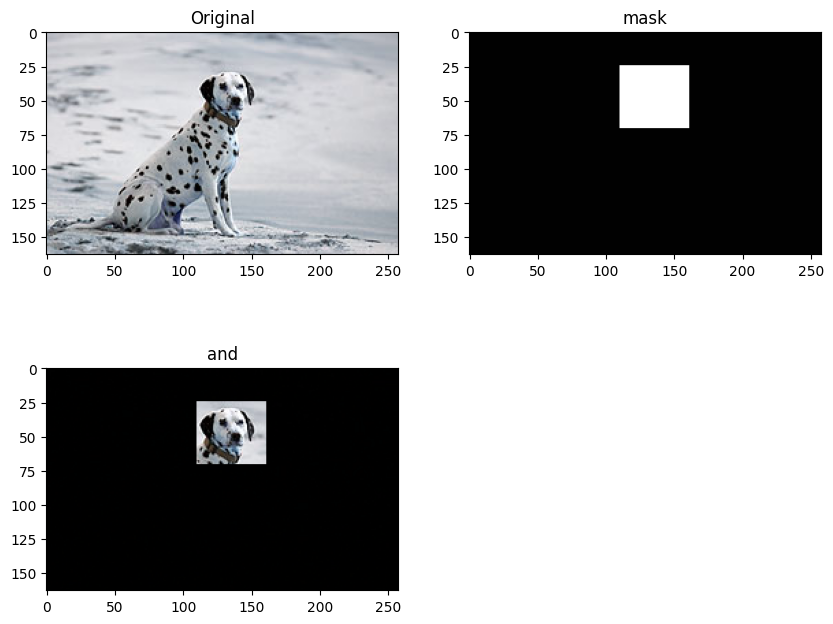

In [4]:
import numpy as np
import cv2

from matplotlib import pyplot as plt

I = cv2.imread("dalmata.jpg")
img_rectangle = np.ones(I.shape, dtype="uint8")
cv2.rectangle(img_rectangle, (110, 25), (160, 70), (255, 255, 255), -1)
print(img_rectangle.shape)
img_and = cv2.bitwise_and(I, img_rectangle)

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(I), plt.title("Original")
plt.subplot(2, 2, 2)
plt.imshow(img_rectangle, "gray"), plt.title("mask")
plt.subplot(2, 2, 3)
plt.imshow(img_and), plt.title("and")


### Función de Transferencia.
Representa como se relacionan los niveles de intensidad de la imagen de entrada con los niveles de intensidad de la imagen de salida. Se puede expresar mediante un vector o array donde en la posición i, que indica el nivel de intensidad de la imagen de entrada, indicamos en que nivel de intensidad se transforma en la imagen de salida.  
<img src="funcion_transf.png" width=80%>

Veamos a continuación ejemplos de funciones de transferencias y como aplicarlas.


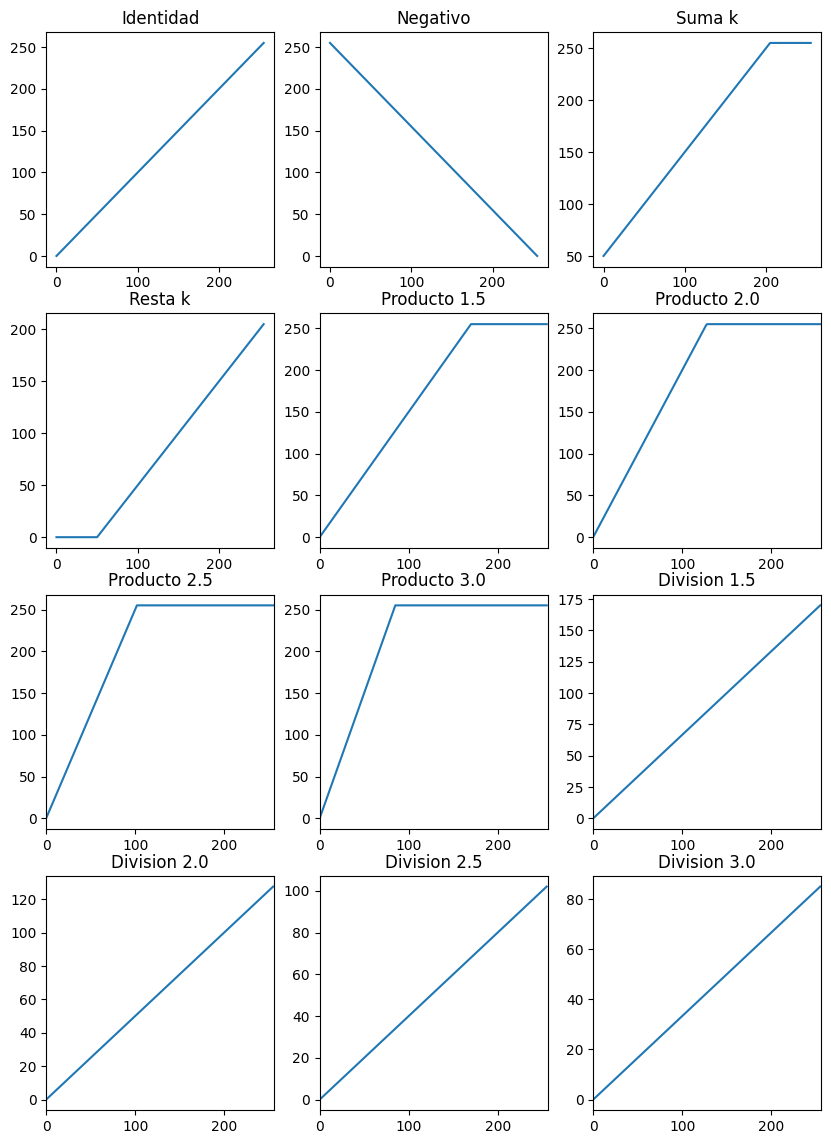

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ind = np.arange(256)
identidad = ind
negativo = 255 - ind

k = 50
suma_k = ind + k
suma_k[suma_k > 255] = 255
# for i in range(len(suma_k)):
#    if suma_k[i]>255:
#        suma_k[i]=255
resta_k = ind - k
resta_k[resta_k < 0] = 0
# for i in range(len(resta_k)):
#    if resta_k[i]<0:
#        resta_k[i]=0

# Producto con diferentes factores
prod = dict()
for f in np.arange(1.5, 3.5, 0.5):
    mask1 = (ind * f >= 0) & (ind * f < 256)
    prod[f] = ind * f * mask1
    mask2 = ind * f > 255
    prod[f] = 255 * mask2 + prod[f]
# Division con diferentes factores
div = dict()
for f in np.arange(1.5, 3.5, 0.5):
    mask1 = (ind / f >= 0) & (ind / f < 256)
    div[f] = (ind / f) * mask1
    mask2 = ind / f > 255
    div[f] = 255 * mask2 + div[f]

plt.figure(figsize=(10, 14))
plt.subplot(4, 3, 1)
plt.plot(ind, identidad), plt.title("Identidad")
plt.subplot(4, 3, 2)
plt.plot(ind, negativo), plt.title("Negativo")
plt.subplot(4, 3, 3)
plt.plot(ind, suma_k), plt.title("Suma k")
plt.subplot(4, 3, 4)
plt.plot(ind, resta_k), plt.title("Resta k")
pos = 5
for k, v in prod.items():
    plt.subplot(4, 3, pos)
    pos += 1
    txt = "Producto " + str(k)
    plt.plot(ind, v), plt.title(txt), plt.xlim(0, 256)

for k, v in div.items():
    plt.subplot(4, 3, pos)
    pos += 1
    txt = "Division " + str(k)
    plt.plot(ind, v), plt.title(txt), plt.xlim(0, 256)


Text(0.5, 1.0, 'Forma 2')

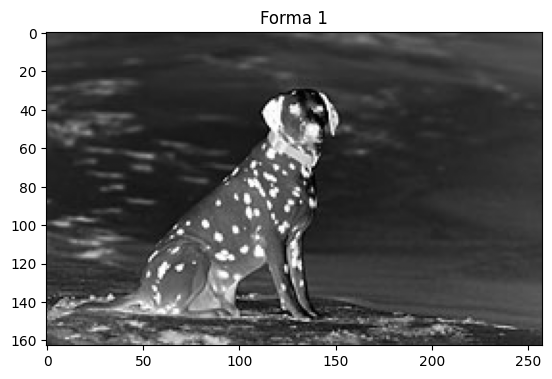

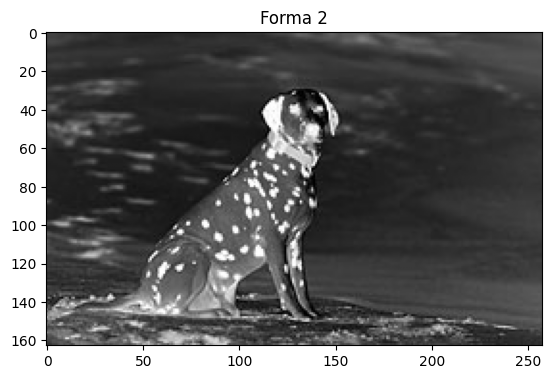

In [ ]:
# Forma de aplicar una funcion de transferencia
I = cv2.imread("dalmata.jpg", 0)
Inew = np.zeros(I.shape, dtype="uint8")
# Forma 1
for r in range(I.shape[0]):
    for c in range(I.shape[1]):
        Inew[r, c] = negativo[I[r, c]]
plt.figure()
plt.imshow(Inew, "gray")
plt.title("Forma 1")
# forma 2
plt.figure()
I2 = negativo[I]
plt.imshow(I2, "gray")
plt.title("Forma 2")

 ### Otras transformaciones
 Existen multitud de trasnformaciones que podemos aplicar a una imagen una vez conocido el concepto de función de transferencia. Entre todas ellas podemos destacar las funcion cuadrado,raíz,  exponencial, logaritmo y función gamma. 

255.0


(<Axes: >, [<matplotlib.lines.Line2D at 0x7b6eae78b020>], (0.0, 256.0))

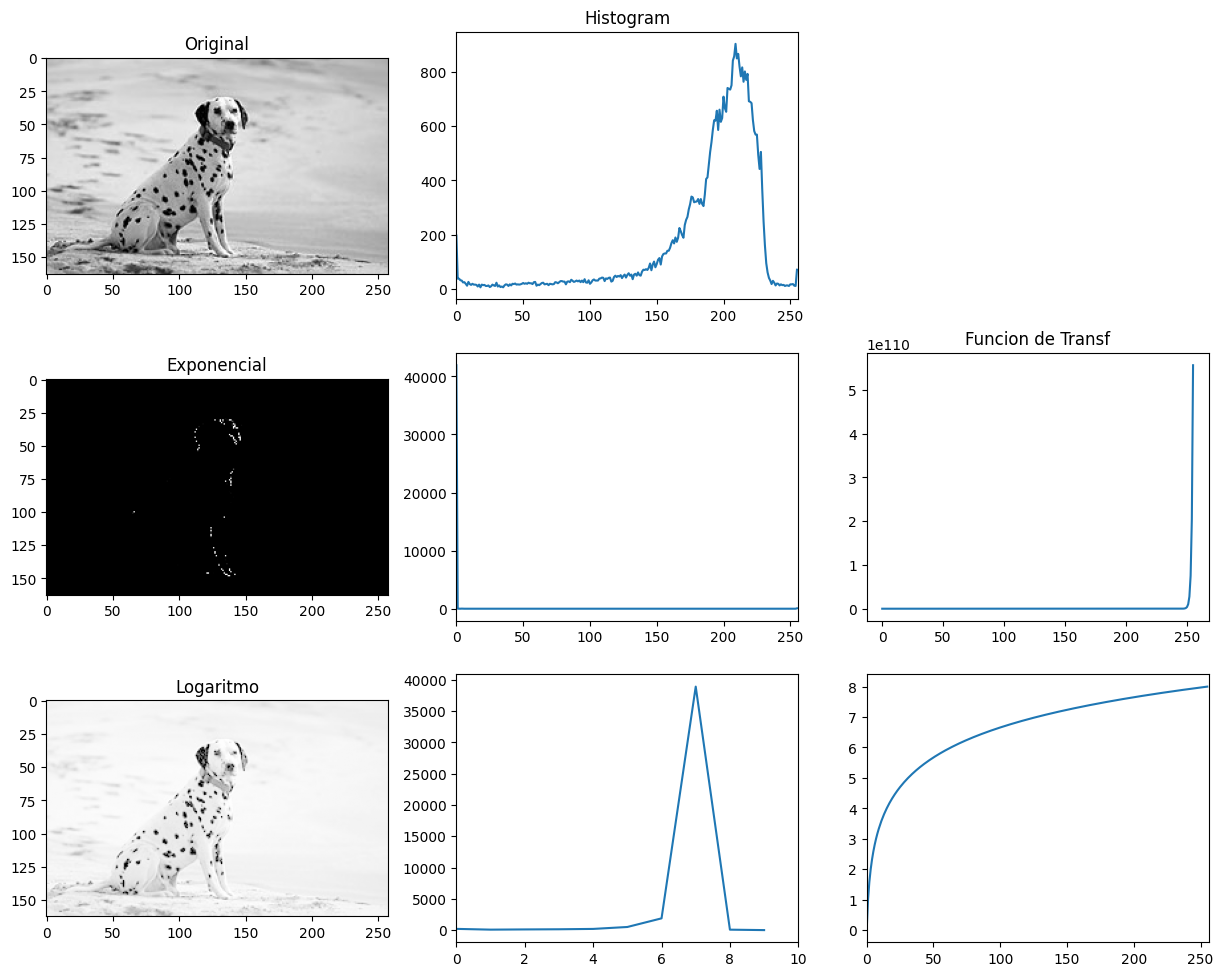

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

I = cv2.imread("dalmata.jpg", 0)
his_ori = cv2.calcHist([I], [0], None, [256], [0, 256])
ind = np.arange(256)
expo = np.exp(ind)
Iexp = expo[I]
Iexp = Iexp / np.max(Iexp) * 255
print(np.max(Iexp))
his_exp = cv2.calcHist([Iexp.astype("uint8")], [0], None, [256], [0, 256])
logar = np.log2((ind + 1))
Ilog = logar[I]
his_log = cv2.calcHist([Ilog.astype("uint8")], [0], None, [10], [0, 10])
plt.figure(figsize=(15, 16))
plt.subplot(4, 3, 1), plt.imshow(I, "gray"), plt.title("Original")
plt.subplot(4, 3, 2), plt.plot(his_ori), plt.xlim([0, 256]), plt.title("Histogram")

plt.subplot(4, 3, 4), plt.imshow(Iexp, "gray"), plt.title("Exponencial")
plt.subplot(4, 3, 5), plt.plot(his_exp), plt.xlim([0, 256])
plt.subplot(4, 3, 6), plt.plot(ind, expo), plt.title("Funcion de Transf")

plt.subplot(4, 3, 7), plt.imshow(Ilog, "gray"), plt.title("Logaritmo")
plt.subplot(4, 3, 8), plt.plot(his_log), plt.xlim([0, 10])
plt.subplot(4, 3, 9), plt.plot(ind, logar), plt.xlim([0, 256])


#### Transformación Gamma
Nuestros ojos perciben el color y la intesidad de la luz de forma diferente a como lo hacen las cámaras digitales.
En una cámara digital si a el sensor le llega dos veces el número de fotones, la cámara lo interpreta como que ha recibido dos veces la señal (esto significa que entre la emisión y la recepción ocurre una  relación lineal). 

Sin embargo nuestros ojos no funciona de forma lineal. Nuestros ojos son más sensitivos a cambios  oscuros que a brillantes.
Para tener en cuenta este hecho podemos usar una correción gamma, una traslación entre la sensibilidad de nuestros ojos y los sensores de una cámara.

La corrección gamma se usa para corregir el brillo de una imagen usando una transformación no lineal entre los valores de la imagen de entrada.Para ello se usa la siguiente transformación:
$O=\frac{I}{255}^{\gamma}\times 255$


<>:10: SyntaxWarning: invalid escape sequence '\g'
<>:10: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_12639/2889706492.py:10: SyntaxWarning: invalid escape sequence '\g'
  txt ="$\gamma$ ="+str(g)


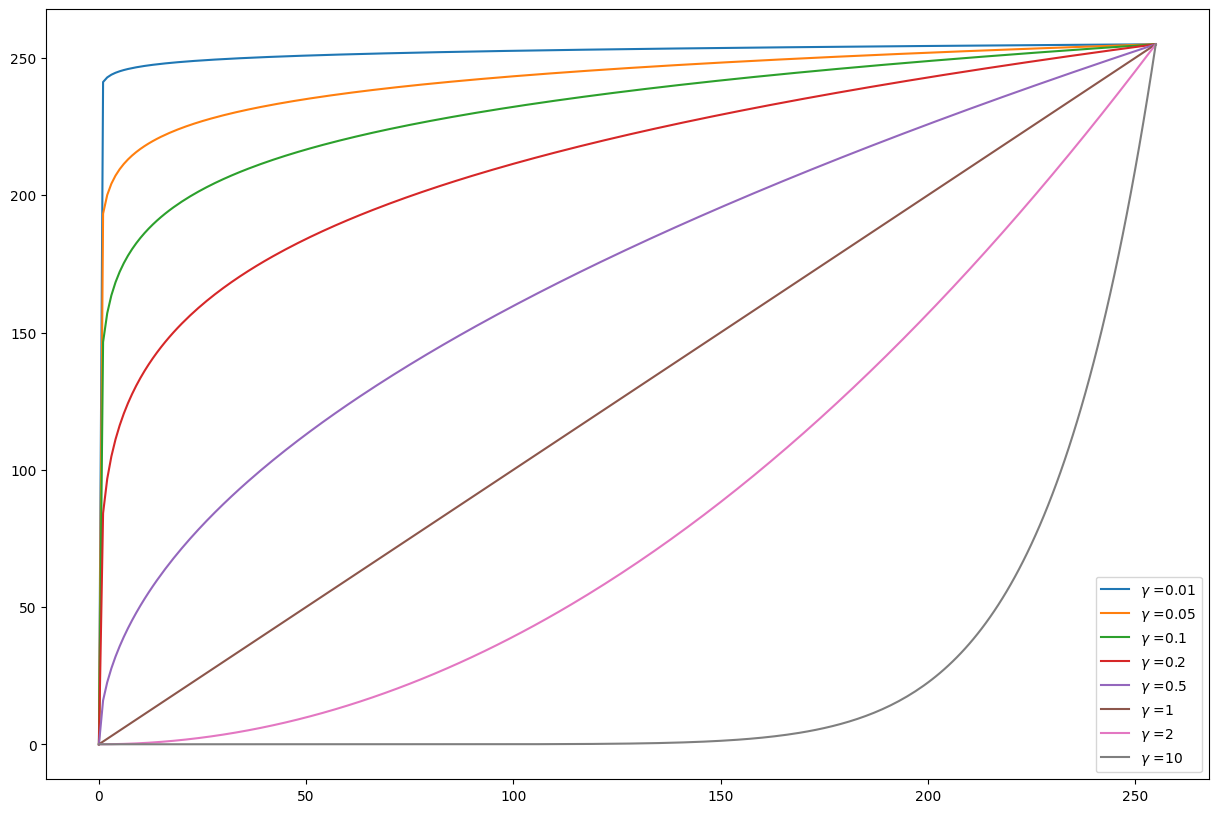

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

fgamma = dict()
ind = np.arange(256)
legends = []
for g in [0.01, 0.05, 0.1, 0.2, 0.5, 1, 2, 10]:
    fgamma[g] = pow((ind / 255), g) * 255
    txt = "$\gamma$ =" + str(g)
    legends.append(txt)

plt.figure(figsize=(15, 10))

for x, v in fgamma.items():
    plt.plot(ind, v)
plt.legend(legends)


<>:14: SyntaxWarning: invalid escape sequence '\g'
<>:14: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_12639/1638146493.py:14: SyntaxWarning: invalid escape sequence '\g'
  txt="$\gamma$ ="+str(x)


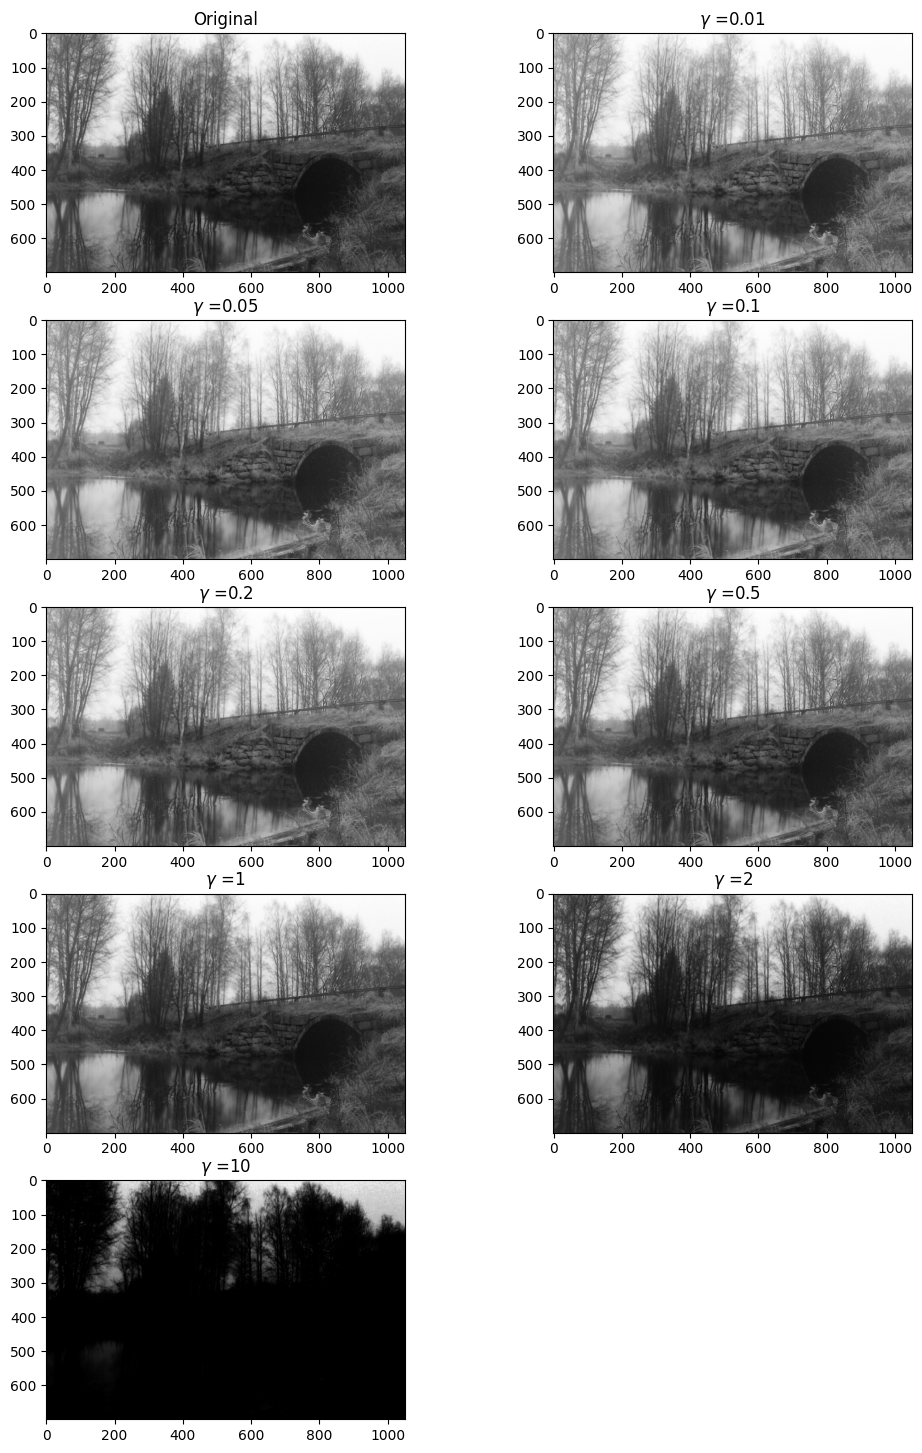

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

I = cv2.imread("low_contrast1.png", 0)
fgamma = dict()
ind = np.arange(256)
for g in [0.01, 0.05, 0.1, 0.2, 0.5, 1, 2, 10]:
    fgamma[g] = pow((ind / 255), g) * 255
plt.figure(figsize=(12, 18))
plt.subplot(5, 2, 1), plt.imshow(I, "gray"), plt.title("Original")
pos = 2
for x, v in fgamma.items():
    Inew = v[I]
    txt = "$\gamma$ =" + str(x)
    plt.subplot(5, 2, pos), plt.imshow(Inew, "gray"), plt.title(txt)
    pos += 1

#### Transformación para ajustar el contraste
Una forma de ajustar el contraste sobre una imagen es aplicar una transformación lineal. A partir del rango de la imagen de entrada y a partir del rango que queremos para la imagen de salida, obtenemos una transformación lineal y una transformación gamma.
A continuación se muestra la implementación de este proceso en la función imadjust. Los parámetros son:
* img: la imagen de entrada. 
* In: rango de los valores de intensidad de la imagen de entrada. Rango por defecto [0,1]
* Out: rango de los valores que queremos en la imagen de salida.Rango por defecto [0,1]
* gamma: factor $\gamma$ que queremos para aplicar la transformación gamma. Valor por defecto 1.

Ejemplos de uso son:
J=imadjust(I,[0,1],[1,0],1); Obtiene la imagen negada
J=imadjust(I,[0.5,0.75],[0,1],1). Aplica una transformación lineal en el rango (0.5,0.75) y el resto lo satura a 1 o 0.


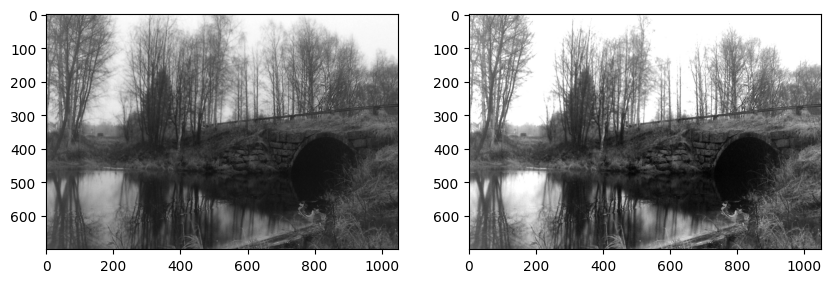

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


def imadjust(img, In=(0, 1.0), Out=(0, 1.0), gamma=1.0):
    low_in, high_in = In
    low_out, high_out = Out

    low_in *= 255.0
    high_in *= 255.0

    low_out *= 255.0
    high_out *= 255.0

    k = (high_out - low_out) / (high_in - low_in)

    table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype(
        "uint8"
    )
    h, w = img.shape[:2]
    imgOut = np.zeros((h, w), np.uint8)

    for r in range(h):
        for c in range(w):
            if img[r, c] <= low_in:
                imgOut[r, c] = low_out
            elif img[r, c] > high_in:
                imgOut[r, c] = high_out
            else:
                res = int(k * (img[r, c] - low_in) + low_out)
                imgOut[r, c] = table[res]

    return imgOut


img = cv2.imread("low_contrast1.png", 0)

out = imadjust(img, [0.25, 0.75], [0, 1])
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img, "gray")
plt.subplot(122)
plt.imshow(out, "gray")

### Ecualización del Histograma

El objetivo de la ecualización es mejorar el contraste de una imagen. Para ello se asigna la frecuencia a cada  nivel de intesidad siguiendo una distribución (normalmente uniforme). 


(<Axes: title={'center': 'Histograma'}>,
 Text(0.5, 1.0, 'Histograma'))

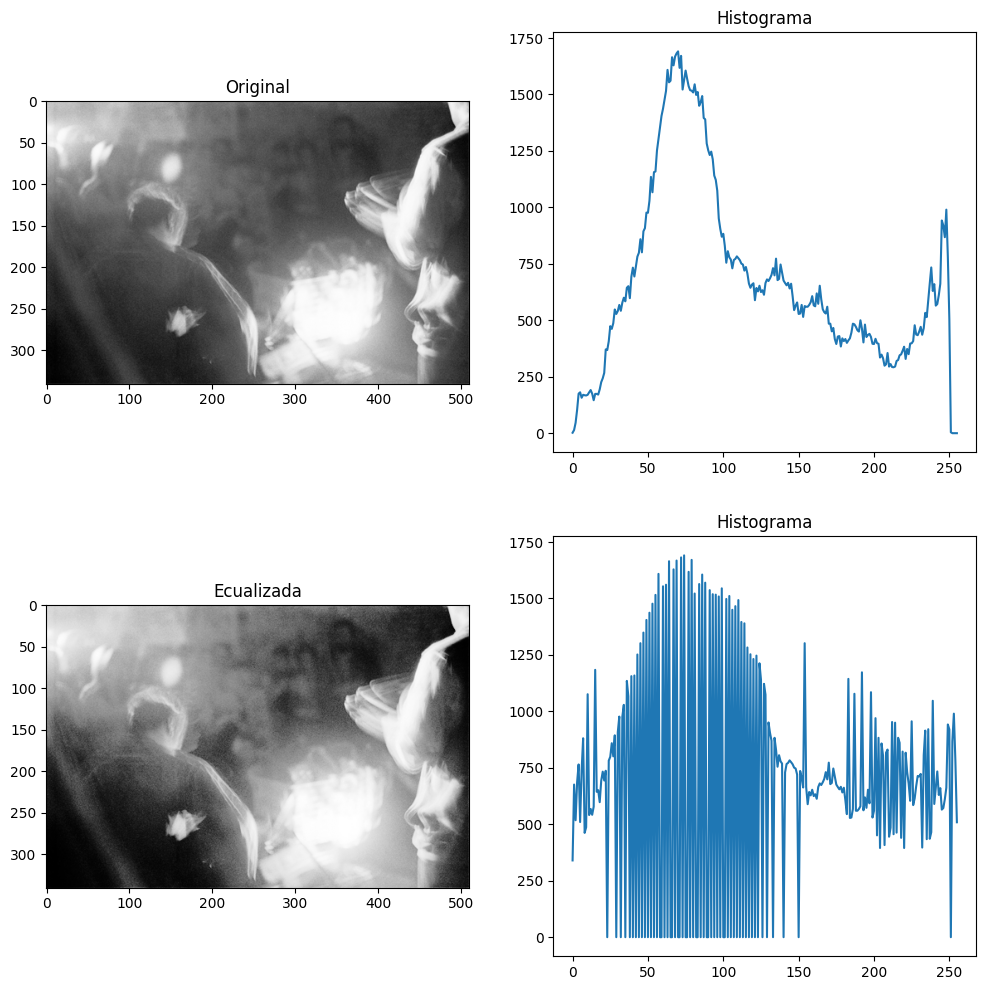

In [11]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("low_contrast3.jpg", 0)
equ = cv2.equalizeHist(img)
# obtenemos el histograma de cada imagen
hori = cv2.calcHist([img], [0], None, [256], [0, 256])
hequ = cv2.calcHist([equ], [0], None, [256], [0, 256])
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1), plt.imshow(img, "gray"), plt.title("Original")
plt.subplot(2, 2, 2), plt.plot(hori), plt.title("Histograma")
plt.subplot(2, 2, 3), plt.imshow(equ, "gray"), plt.title("Ecualizada")
plt.subplot(2, 2, 4), plt.plot(hequ), plt.title("Histograma")


Una ecualización global puede mejorar el contraste de una imagen pero a la vez puede saturar regiones locales. Una mejor forma de aplicar la ecualización es hacerlo por bloques. Esto es lo que se conoce como **ecualización del histograma adaptativa**. Esto se logra dividiendo la imagen en bloques (normalmente 8x8). Sobre cada bloque se aplica una ecualización. Puede que si en un bloque aparece ruido, el efecto de ecualizar haga más visible el ruido. Para evitar este efecto se estable un límite de contraste. Así si un bin supera este límite los pixeles en este bin son distribuidos uniformente a los otros bins antes de aplicar la ecualización. 


(<Axes: title={'center': 'Histograma'}>,
 Text(0.5, 1.0, 'Histograma'))

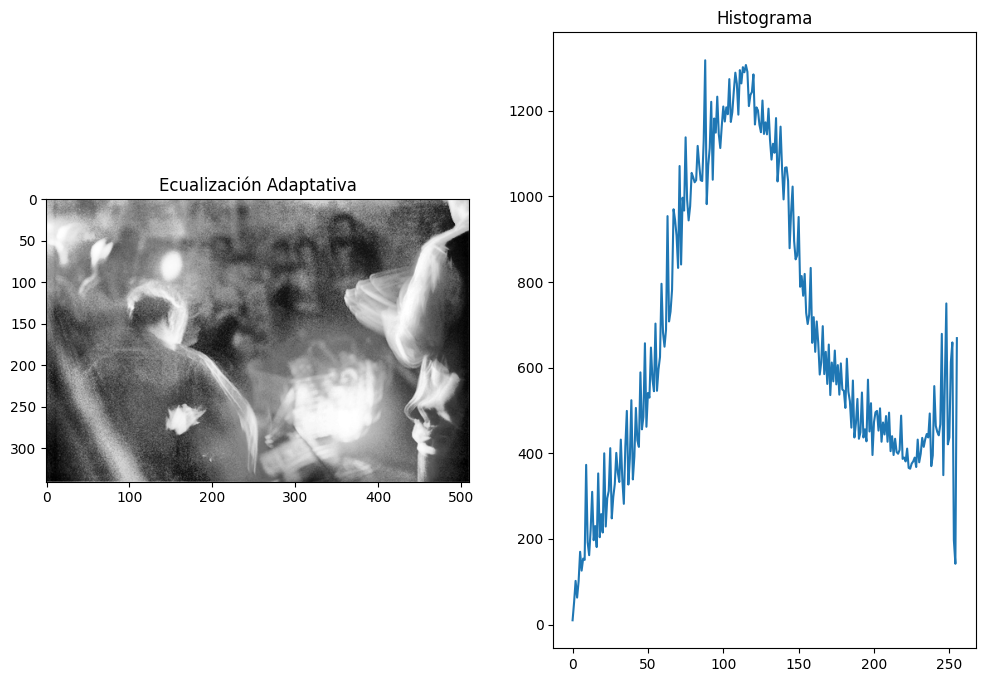

In [ ]:
import numpy as np
import cv2

img = cv2.imread("low_contrast3.jpg", 0)

# Crea un objeto CLAHE (los argumentos son opcionales). clipLimit limite de frecuencia en un bin
clahe = cv2.createCLAHE(clipLimit=4, tileGridSize=(4, 4))
cl1 = clahe.apply(img)
hcl1 = cv2.calcHist([cl1], [0], None, [256], [0, 256])
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1), plt.imshow(cl1, "gray"), plt.title("Ecualización Adaptativa")
plt.subplot(1, 2, 2), plt.plot(hcl1), plt.title("Histograma")

##### Ecualización de imágenes en color
Que pasa si ecualizamos las tres bandas de color RGB y obtenemos la imagen ecualizada.

(<Axes: title={'center': 'Ecualizada'}>,
 Text(0.5, 1.0, 'Ecualizada'))

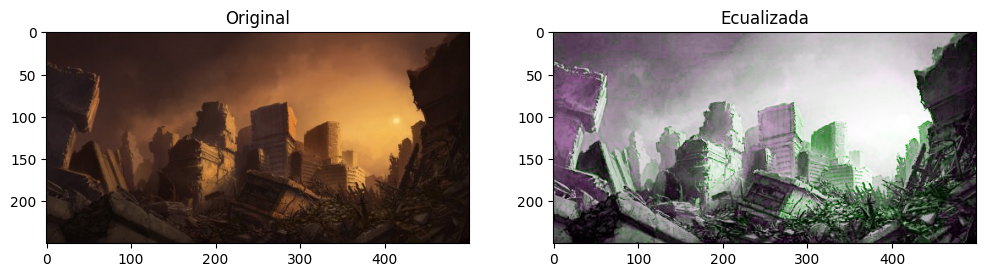

In [ ]:
import numpy as np
import cv2
import copy

img = cv2.imread("fantastic_village.jpg")
original = copy.deepcopy(img)
img[:, :, 0] = cv2.equalizeHist(img[:, :, 0])
img[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
img[:, :, 2] = cv2.equalizeHist(img[:, :, 0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1), plt.imshow(original), plt.title("Original")
plt.subplot(1, 2, 2), plt.imshow(img), plt.title("Ecualizada")

Parece que no funciona la ecualización de las tres bandas RGB. La aproximación que vamos hacer es pasar al sistema HSV y ecualización la banda que tiene la información de lumnosidad. 

(<Axes: title={'center': 'Ecualizada'}>,
 Text(0.5, 1.0, 'Ecualizada'))

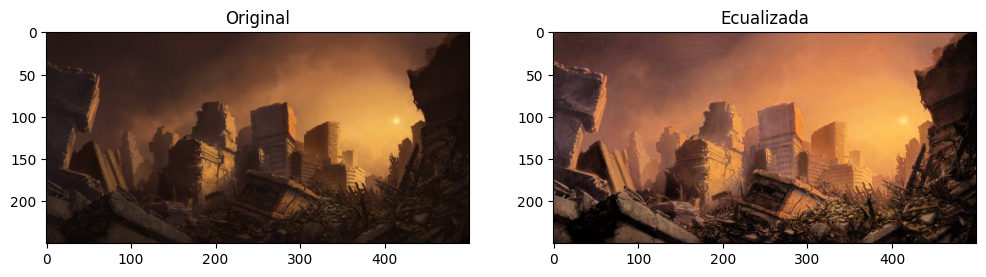

In [ ]:
import numpy as np
import cv2
import copy

img = cv2.imread("fantastic_village.jpg")
original = copy.deepcopy(img)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
imghsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
imghsv[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
img = cv2.cvtColor(imghsv, cv2.COLOR_HSV2RGB)
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1), plt.imshow(original), plt.title("Original")
plt.subplot(1, 2, 2), plt.imshow(img), plt.title("Ecualizada")

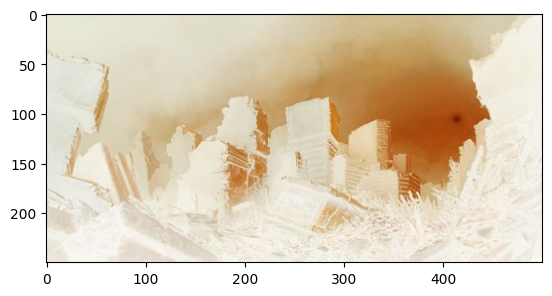

In [16]:
# Ejercicio 1
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("fantastic_village.jpg")
plt.imshow(cv2.bitwise_not(img))

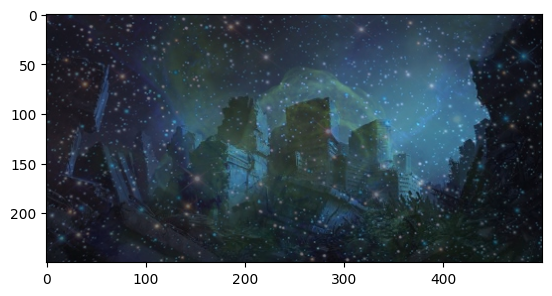

In [ ]:
# Ejercicio 2
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread("fantastic_village.jpg")
img2 = cv2.imread("stars.jpg")

plt.imshow(cv2.addWeighted(img1, 0.6, img2, 0.4, 0))

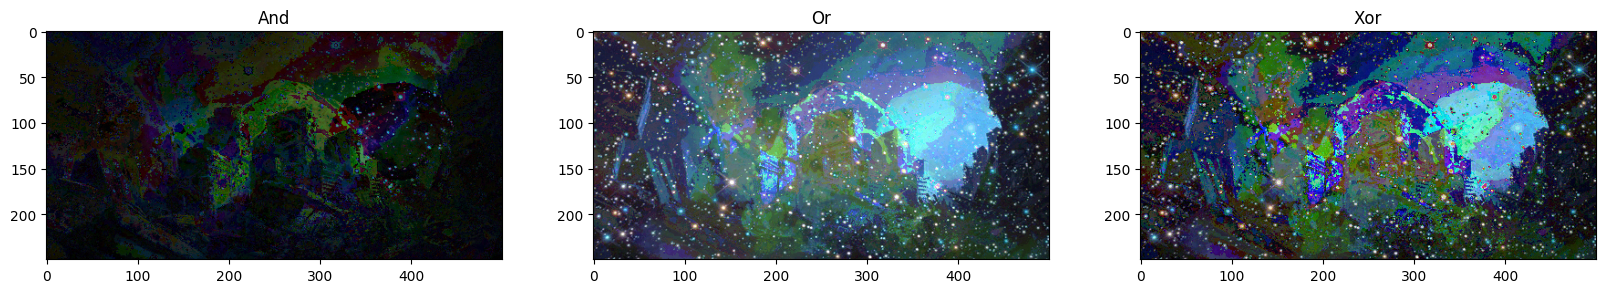

In [46]:
# Ejercicio 3
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread("fantastic_village.jpg")
img2 = cv2.imread("stars.jpg")

plt.figure(figsize=(20, 25))
for i, (opt_func, opt) in enumerate(zip(
    [cv2.bitwise_and, cv2.bitwise_or, cv2.bitwise_xor], ["And", "Or", "Xor"]
)):
    aux = opt_func(img1, img2)
    plt.subplot(1, 3, i+1)
    plt.imshow(aux)
    plt.title(opt)

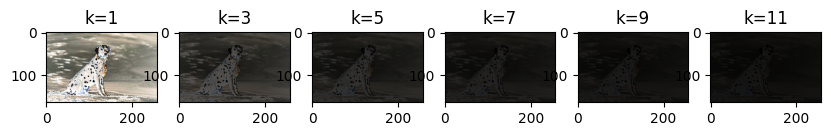

In [51]:
# Ejercicio 4
import cv2
import matplotlib.pyplot as plt
import numpy as np

def transfer_func(x, K):
    return np.clip((np.sin(x * np.pi / 255) / K) * 255, 0, 255).astype(np.uint8)

img = cv2.imread("dalmata.jpg")

plt.figure(figsize=(10, 15))
for i, k in enumerate(range(1, 12, 2)):
    new_img = transfer_func(img, k)
    plt.subplot(1, 6, i+1)
    plt.imshow(new_img)
    plt.title(f"k={k}")

<>:16: SyntaxWarning: invalid escape sequence '\g'
<>:16: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_12639/1195075243.py:16: SyntaxWarning: invalid escape sequence '\g'
  txt = "$\gamma$ =" + str(x)


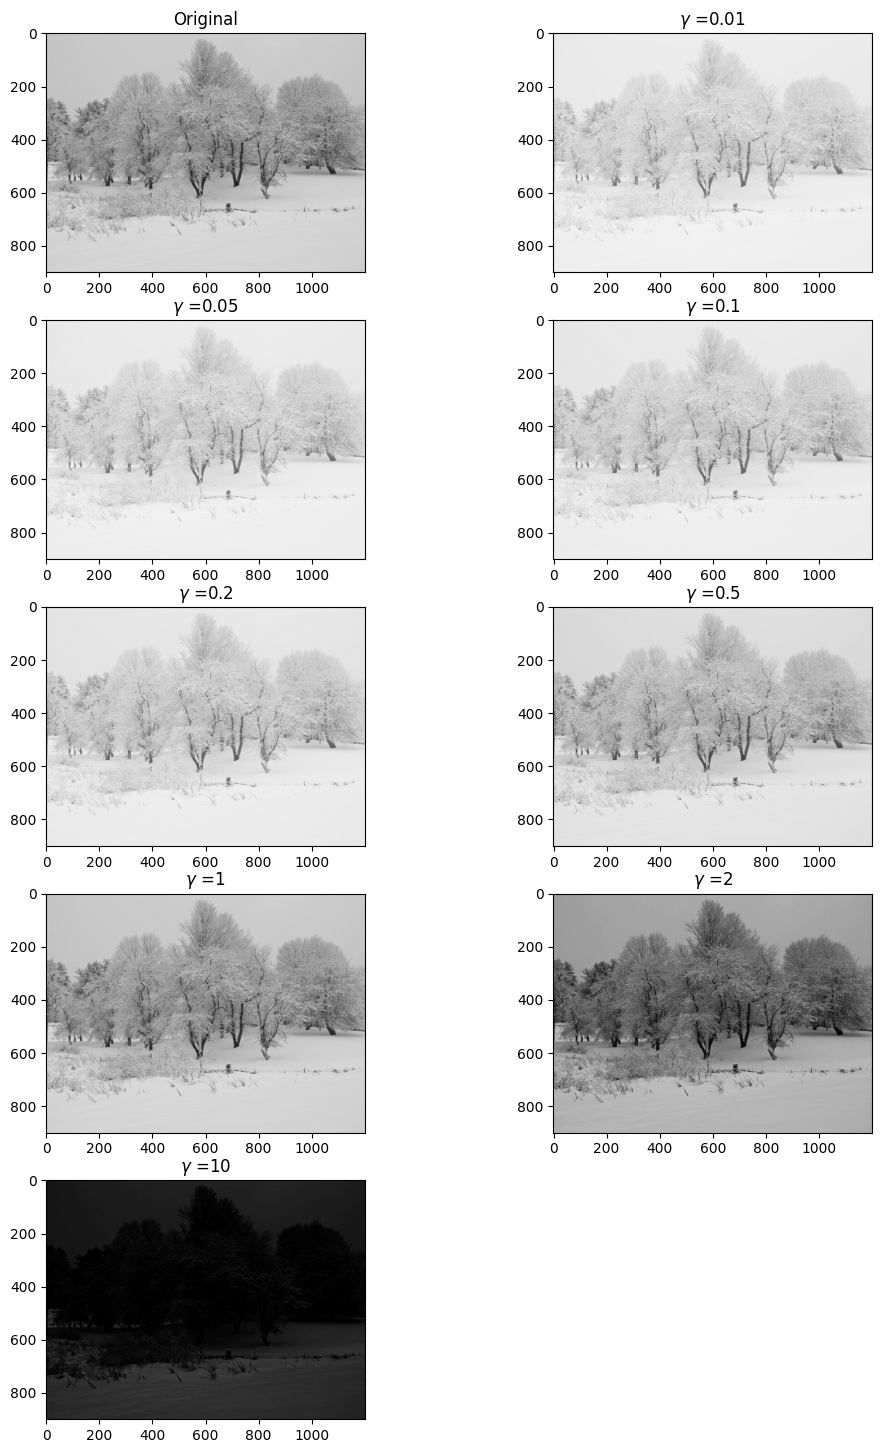

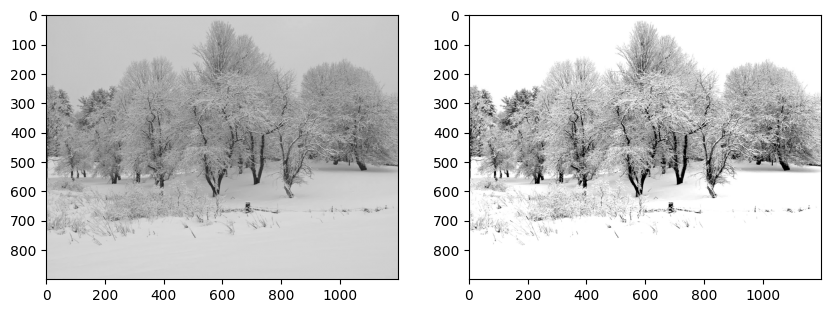

In [ ]:
# Ejercicio 5.1
import cv2
import matplotlib.pyplot as plt
import numpy as np

I = cv2.imread("low_contrast2.jpg", 0)
fgamma = dict()
ind = np.arange(256)
for g in [0.01, 0.05, 0.1, 0.2, 0.5, 1, 2, 10]:
    fgamma[g] = pow((ind / 255), g) * 255
plt.figure(figsize=(12, 18))
plt.subplot(5, 2, 1), plt.imshow(I, "gray"), plt.title("Original")
pos = 2
for x, v in fgamma.items():
    Inew = v[I]
    txt = "$\gamma$ =" + str(x)
    plt.subplot(5, 2, pos), plt.imshow(Inew, "gray"), plt.title(txt)
    pos += 1
    
    
img = cv2.imread("low_contrast2.jpg", 0)

out = imadjust(img, [0.25, 0.75], [0, 1])
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img, "gray")
plt.subplot(122)
plt.imshow(out, "gray")

<>:16: SyntaxWarning: invalid escape sequence '\g'
<>:16: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_12639/737481545.py:16: SyntaxWarning: invalid escape sequence '\g'
  txt = "$\gamma$ =" + str(x)


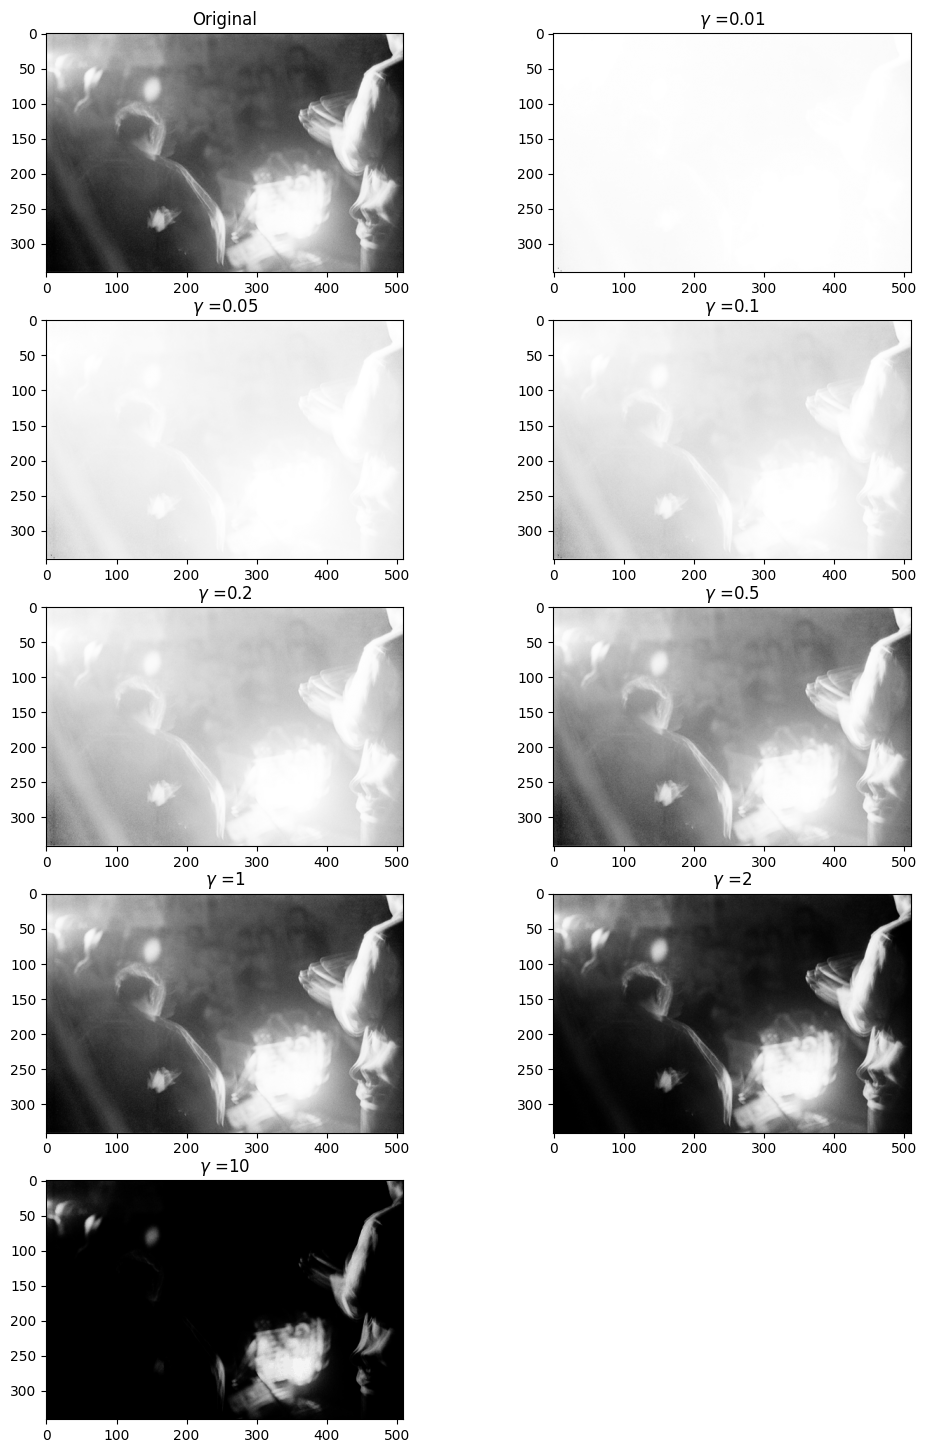

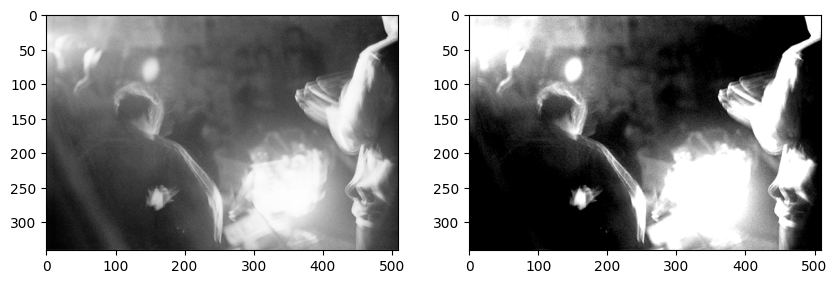

In [57]:
# Ejercicio 5.2
import cv2
import matplotlib.pyplot as plt
import numpy as np

I = cv2.imread("low_contrast3.jpg", 0)
fgamma = dict()
ind = np.arange(256)
for g in [0.01, 0.05, 0.1, 0.2, 0.5, 1, 2, 10]:
    fgamma[g] = pow((ind / 255), g) * 255
plt.figure(figsize=(12, 18))
plt.subplot(5, 2, 1), plt.imshow(I, "gray"), plt.title("Original")
pos = 2
for x, v in fgamma.items():
    Inew = v[I]
    txt = "$\gamma$ =" + str(x)
    plt.subplot(5, 2, pos), plt.imshow(Inew, "gray"), plt.title(txt)
    pos += 1
    
    
img = cv2.imread("low_contrast3.jpg", 0)

out = imadjust(img, [0.25, 0.75], [0, 1])
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img, "gray")
plt.subplot(122)
plt.imshow(out, "gray")

Si la imagen tiene regiones muy oscuras o muy claras, la transformada gamma puede ser mejor, ya que ajusta todo el rango dinámico sin recortes abruptos.
La función de imadjust genera mayor contraste en la imágenes.

(<Axes: title={'center': 'Histograma'}>,
 Text(0.5, 1.0, 'Histograma'))

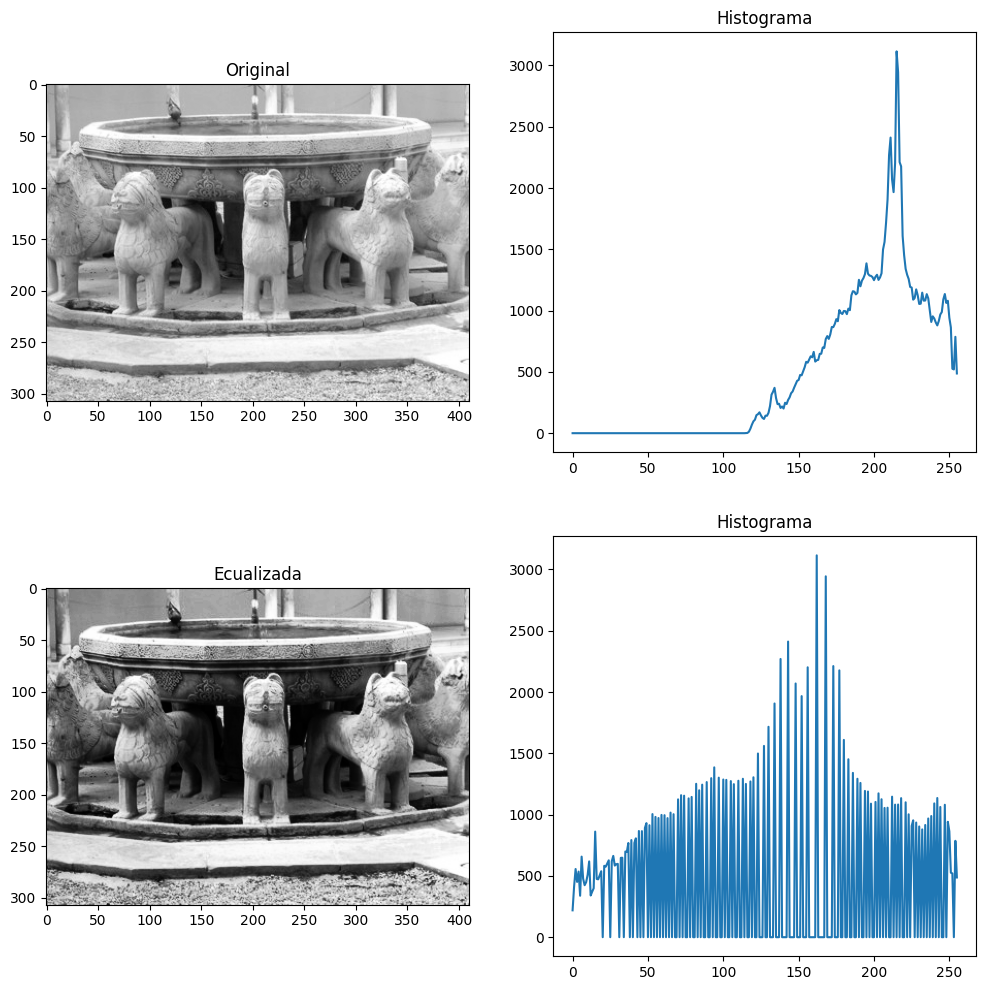

In [58]:
# Ejercicio 6
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("patio_leones.ppm", 0)
equ = cv2.equalizeHist(img)
# obtenemos el histograma de cada imagen
hori = cv2.calcHist([img], [0], None, [256], [0, 256])
hequ = cv2.calcHist([equ], [0], None, [256], [0, 256])
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1), plt.imshow(img, "gray"), plt.title("Original")
plt.subplot(2, 2, 2), plt.plot(hori), plt.title("Histograma")
plt.subplot(2, 2, 3), plt.imshow(equ, "gray"), plt.title("Ecualizada")
plt.subplot(2, 2, 4), plt.plot(hequ), plt.title("Histograma")


## Ejercicios
<ol>
    <li>Obtener para la imagen "fantastic_village.jpg" la imagen negada. La imagen resultante debe ser una imagen de color
     <li> Obtener una imagen "blending" de las dos imágenes "fantastic_village.jpg" y "stars.jpg". Una imagen blending es sumar las dos imágenes pero ponderando previamente las imágenes originales por dos factores f1 y f2 tal que f1+f2=1.La imagen resultante debe ser una imagen de color
     <li> Obtener la imagen and, or y xor de la imagen "fantastic_village.jpg" y "stars.jpg". La imagen resultante debe ser una imagen de color
      <li> Obtener la funcion de transferencia $f(x)=sin(x*\pi/K)$. Para diferentes valores de k.Aplicar la función de transferencia a la imagen "dalmata.jpg"
      <li> Aplicar la transformada gamma sobre las imágenes "low_contrast2.png" y "low_contrast3.png". Comparar con los mejores resultados de aplicar la función imadjust.
      <li> Ecualizar la imagen "patio_leones.ppm"     
    <li> <b> Lo que oculta una imagen.</b> Estas dos imágenes
<table style="width: 390px; height: 266px;" border="0">        
<tr><td><a title="Original" href="castillo.pgm"><img src="castillo.png" width="256" height="256"></a>
    </td>    
    <td><a title="Imagen con otra imagen oculta"
        href="Castillo_oculto2bits.pgm"><img src="Castillo_oculto2bits.png" width="256" height="256"></a></td></tr>
</table>    
<p>A priori parecen la misma imagen. Sin embargo la imagen de la derecha oculta algo, en particular oculta una versión umbralizada de la  imagen vacas. <img src="vacas.png" width="256" height="256"></p>
<p>Dos posibles imágenes ocultas son:</p>
<table style="width: 390px; height: 266px;" border="0">
    <tbody>
        <tr>
            <td><a href="recuperada_castillo.pgm"><img src="recuperada_castillo.png" alt="imagen oculta" width="256" height="256"></a></td>
            <td><a href="recuperada_castillo2.pgm"><img src="recuperada_castillo2.png" width="256" height="256"></a></td>
        </tr>
    </tbody>
</table>
<p></p>
<p></p>
<p></p>
<p></p>
<p>Lo único que sabemos de esta imagen es que simplemente tienen 3 niveles de gris: 0 128 y 255 (imagen de la derecha ). Podrian ser dos niveles tambien 0 255 (imagen de la izquierda ). Explica como se ha ocultado la imagen de las vacas en
    el castillo y como se ha recuperado. Dar el código en Python para obtener la imagen oculta y también el código para ocultar la imagen vacas en el castillo. Analizar el numero de bits que se podria ocultar en el castillo de la imagen vacas sin percibir artefactos en la imagen castillo</p>
<p></p>
<p></p>
        
</ol>        

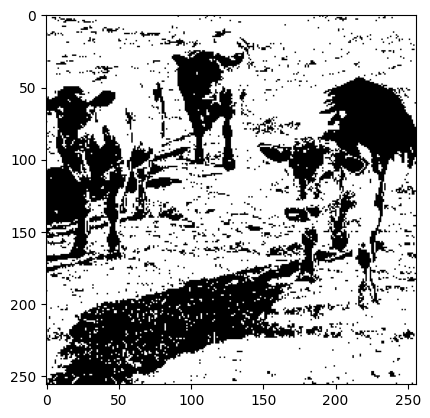

In [66]:
# Ejercicio 7
import cv2
from matplotlib import pyplot as plt

castillo = cv2.imread("Castillo_oculto2bits.png", cv2.IMREAD_GRAYSCALE)

vacas_extraida = (castillo & 1) * 255

plt.imshow(vacas_extraida, cmap="gray")

In [79]:
import cv2
import numpy as np

# Cargar las imágenes
castillo = cv2.imread('castillo.png', cv2.IMREAD_GRAYSCALE)
vacas = cv2.imread('vacas.png', cv2.IMREAD_GRAYSCALE)

vacas = cv2.resize(vacas, (castillo.shape[1], castillo.shape[0]))

castillo_oculto = (castillo & 0xFE) | (vacas > 128) 

# Guardar la imagen resultante
cv2.imwrite('castillo_con_vacas.png', castillo_oculto)

True

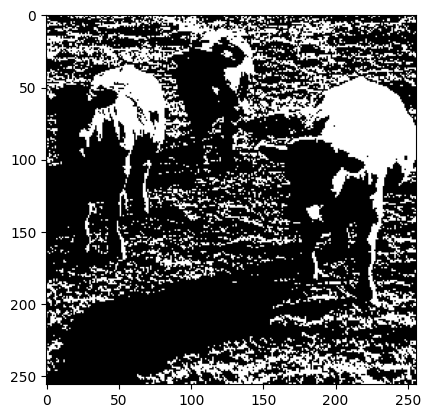

In [75]:
import cv2
from matplotlib import pyplot as plt

castillo = cv2.imread("castillo_con_flores.png", cv2.IMREAD_GRAYSCALE)

vacas_extraida = (castillo & 1) * 255

plt.imshow(vacas_extraida, cmap="gray")

El LSB es el bit menos significativo en la representación binaria de un número. En una imagen, cada píxel se representa como un valor numérico.
Modificar el LSB de un píxel tiene un impacto visual mínimo en la imagen, por lo que es ideal para ocultar información sin que sea perceptible.

Se usa 0xFE (que es 11111110 en binario) para limpiar el LSB. Es una máscara. Luego se se hace OR que sirve para añadir el LSB limpio con la imagen binaria de las vacas (si el píxel es mayor a 128 entonces ese píxel es 1).

Para deshacer el cambio y obtener la imagen escondida se obtiene el bit menos significativo (LBP) y se convierte a una imagen visible (* 255).

Lo normal sería usar 1 bit por píxel, lo que no crea modificaciones visuales aparentes. Con ello se podrían modificar en una imagen a color, quizá 3 bits por canal y en una imagen en grises solo 1, dando lugar a NxM píxeles siendo NxM el tamaño de la imagen (altoXancho).